# 쳅터 5. 연계

In [1]:
# setting packages if you not installed

using Pkg

Pkg.add(["CSV", "DataFrames", "Turing","Logging", "StatisticalRethinking", "StatisticalRethinkingPlots", "StatsBase", "Random", "LaTeXStrings", "StatsPlots", "Dagitty"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


필요한 패키지를 불러옵니다

In [2]:
using CSV
using DataFrames
using Turing
using Logging
using StatisticalRethinking
using StatisticalRethinking: link  # import explicitly, because Turing has link method also
using StatisticalRethinkingPlots
using StatsBase
using Random
using LaTeXStrings
using StatsPlots

using Dagitty

default(label=false)
Logging.disable_logging(Logging.Warn);

### data 불러오기

줄리아에서 자료를 불러옵니다.

In [3]:
url = "https://raw.githubusercontent.com/StatisticalRethinkingJulia/SR2TuringJupyter.jl/main/data/WaffleDivorce.csv"

data = DataFrame(CSV.File(download(url)))
data[!,:D] = standardize(ZScoreTransform, data.Divorce)
data[!,:M] = standardize(ZScoreTransform, data.Marriage)
data[!,:A] = standardize(ZScoreTransform, data.MedianAgeMarriage);

결혼 연령의 중간값의 표준편차는 아래와 같습니다.

In [4]:
# how to set numeric format?
println("standard deviation of median age is $(std(data.MedianAgeMarriage))")

standard deviation of median age is 1.2436303013880823


데이터를 생성해 봅니다.
먼저 모델을 정의합니다.

In [5]:
Random.seed!(100)

@model function model_m5_1(A, D)
    σ ~ Exponential(1)  # how to change unicode \sigma?
    a ~ Normal(0, 0.2)
    bA ~ Normal(0, 0.5)
    μ = @. a + bA * A  # what is @ mean?
    D ~ MvNormal(μ, σ)
end

model_m5_1 (generic function with 2 methods)

데이터와 연계시켜 봅니다.
생성된 데이터의 1~5번까지를 봐봅니다.

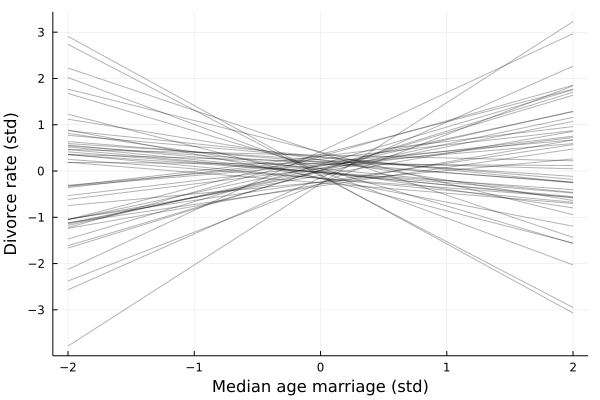

In [6]:
m5_1 = sample(model_m5_1(data.A, data.D), NUTS(), 1000)
m5_1_df = DataFrame(m5_1)
prior = sample(model_m5_1([0], [0]), Prior(), 1000)
prior_df = DataFrame(prior)

prior_df[1:5,:]


# caculate \mu for every prior sample on age=-2 and age=2
bounds = [-2, 2]
μ = link(prior_df, [:a, :bA], bounds)
μ = hcat(μ...);

p = plot(xlab="Median age marriage (std)", ylab="Divorce rate (std)")
for μ′ ∈ first(eachrow(μ), 50)
    plot!(bounds, μ′; c=:black, alpha=0.3)
end
display(p)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*